In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Загружаем данные

In [13]:
trainX = pd.read_csv('data/trainX.csv')
trainY = pd.read_csv('data/trainY.csv')
testX = pd.read_csv('data/testX.csv')
sub = pd.read_csv('data/sampleSubmission.csv')


### Посмотрим на корреляции признаков

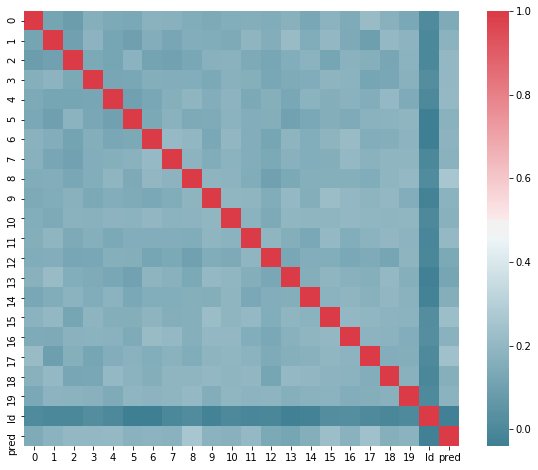

In [25]:
trainX['pred'] = trainY.Value
corr = trainX.corr()

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

#### Корреляций не видно, но можно удалить столбец Id

In [69]:
trainX = trainX.drop(['Id', 'pred'], axis=1).values
trainY = trainY.values
testX = testX.values

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(trainX, trainY, shuffle=True)

### Препроцессинг

In [39]:
from sklearn import preprocessing

scaler = preprocessing.MaxAbsScaler()
scaled_trainX = scaler.fit_transform(X_train)
scaled_testX = scaler.transform(X_val)

### Baseline

In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_log_error as mse

In [51]:
baseline = KNeighborsRegressor(n_neighbors=1)
baseline.fit(scaled_trainX, y_train)
baseline_prediction = baseline.predict(scaled_testX)

print('mse = %.2f' % mse(y_val, baseline_prediction))

mse = 0.05


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score

#### Random Forest

In [58]:
model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_val)
# y_pred[y_pred < 0.0] = 0.0

print(mse(y_val, y_pred))

0.030258375157269937


In [64]:
cross_val_score(model, trainX, trainY, cv=3).mean()

0.38429076785384125

#### XGBoost

In [73]:
model = XGBRegressor(random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_val)
# y_pred[y_pred < 0.0] = 0.0

print(mse(y_val, y_pred))

0.024918222995209707


In [74]:
cross_val_score(model, trainX, trainY, cv=3).mean()

0.443215993459064